<a href="https://colab.research.google.com/github/LuciaArias03/ProyectoDSParteI-Arias/blob/main/Data_StoryTelling%2BArias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üìä **Pondremos a prueba las habilidades de regresi√≥n dise√±ando un algoritmo para predecir con precisi√≥n los precios de las viviendas en India.**

Quizas haya compradores que no les importa solamente el tama√±o de la casa; existen otros factores clave para decidir el precio de una casa o propiedad. Puede ser extremadamente dif√≠cil determinar el conjunto correcto de atributos que contribuyen a comprender el comportamiento del comprador.

En la India, La "aprobaci√≥n RERA" se refiere a la aprobaci√≥n de un proyecto inmobiliario seg√∫n la Ley de Regulaci√≥n Inmobiliaria (RERA), lo que significa que el proyecto cumple con los criterios legales, financieros y operativos establecidos por el gobierno para garantizar la transparencia, la entrega a tiempo y el cumplimiento de las normativas, protegiendo los intereses de los compradores de viviendas.

üß† **Hip√≥tesis**

El tama√±o de la propiedad (en pies cuadrados) es el factor m√°s influyente en el precio de la casa.

La ubicaci√≥n geogr√°fica de una casa afecta directamente su precio.

Las caracter√≠sticas adicionales como la condici√≥n de "lista para mudarse" o la aprobaci√≥n por RERA aumentan el valor de la propiedad.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

file_path = '/content/drive/MyDrive/Data_StoryTelling+Arias/train.csv'

try:
    df_train = pd.read_csv(file_path)
    # Muestra las primeras 5 filas para verificar.
    print("\nPrimeras 5 filas del DataFrame de entrenamiento:")
    print(df_train.head())

    # Muestra informaci√≥n general sobre el DataFrame.
    print("\nInformaci√≥n del DataFrame:")
    df_train.info()

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encuentra en la sesi√≥n de Colab. Aseg√∫rate de haberlo subido correctamente y de que el nombre coincide.")


Primeras 5 filas del DataFrame de entrenamiento:
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0        

In [2]:
# df_train es el DataFrame que creaste al leer 'train.csv'
# Muestra informaci√≥n sobre el DataFrame
print(df_train.info())

# Muestra las primeras 5 filas para una inspecci√≥n visual
print(df_train.head())

# Cuenta el n√∫mero de valores nulos por columna
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Opcional: Para ver el porcentaje de valores faltantes
print("\nPorcentaje de valores nulos:")
total_rows = len(df_train)
null_percentage = (df_train.isnull().sum() / total_rows) * 100
print(null_percentage.sort_values(ascending=False))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
None
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner            

El conjunto de datos contiene 29,451 entradas y 12 columnas. El aspecto m√°s importante es que no hay valores nulos en ninguna columna, lo que nos permite saltar la etapa de imputaci√≥n de datos. Esto simplifica enormemente el proceso.

In [3]:
duplicate_rows = df_train.duplicated()

# Cuenta el n√∫mero total de duplicados
num_duplicates = duplicate_rows.sum()

print(f"El n√∫mero total de filas duplicadas en el DataFrame es: {num_duplicates}")

# Para ver las filas duplicadas, puedes filtrar el DataFrame
if num_duplicates > 0:
    print("\nEjemplo de filas duplicadas:")
    print(df_train[duplicate_rows].head())
else:
    print("\nNo se encontraron filas duplicadas.")

El n√∫mero total de filas duplicadas en el DataFrame es: 401

Ejemplo de filas duplicadas:
     POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
1904    Dealer                   1     0        3       BHK  1209.628644   
2351    Dealer                   0     0        2       BHK   896.680112   
2611    Dealer                   0     0        3       BHK  1350.256549   
2618    Dealer                   1     0        2       BHK   800.000000   
3211     Owner                   0     0        2       BHK   712.105799   

      READY_TO_MOVE  RESALE                        ADDRESS  LONGITUDE  \
1904              0       1              Salt Lake,Kolkata  22.541110   
2351              1       1            Zirakpur,Chandigarh  30.662283   
2611              1       1  Sector 78 Faridabad,Faridabad  28.380160   
2618              0       1           Chandapura,Bangalore  12.800090   
3211              1       1              BataNagar,Kolkata  22.506860   

       LATITU

Estos 401 duplicados que se encontraron pueden sesgar los resultados y hacer que el modelo parezca m√°s preciso de lo que realmente es. Una buena pr√°ctica en el data wrangling es eliminar estos duplicados antes de cualquier an√°lisis o modelado serio.

In [4]:
# Elimina las filas duplicadas del DataFrame
df_train.drop_duplicates(inplace=True)

print(f"N√∫mero de filas despu√©s de eliminar duplicados: {len(df_train)}")

N√∫mero de filas despu√©s de eliminar duplicados: 29050


Conteo de propiedades por anunciante:
POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64


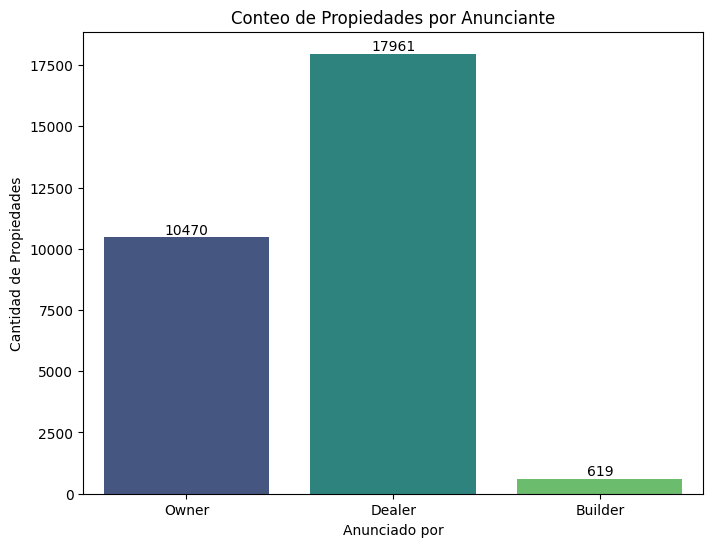

In [5]:
df_train.drop_duplicates(inplace=True)

# Contar el n√∫mero de propiedades por anunciante
posted_by_counts = df_train['POSTED_BY'].value_counts()

print("Conteo de propiedades por anunciante:")
print(posted_by_counts)

# Crear un gr√°fico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='POSTED_BY', data=df_train, hue='POSTED_BY', palette='viridis', legend=False)
plt.title('Conteo de Propiedades por Anunciante')
plt.xlabel('Anunciado por')
plt.ylabel('Cantidad de Propiedades')

# A√±adir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

üìä Los resultados revelan que quienes buscan vender sus propiedades prefieren contactar con un agente inmobiliario para publicar su vivienda.
En segundo lugar el propietario la publica por sus propios medios.
Por √∫ltimo, en menor medida, la empresa constructora publica el inmueble a vender.

Conteo de propiedades por n√∫mero de habitaciones:
BHK_NO.
1      3540
2     13164
3     10365
4      1698
5       189
6        52
7        11
8        10
9         3
10        4
11        1
12        3
13        1
15        4
17        1
20        4
Name: count, dtype: int64


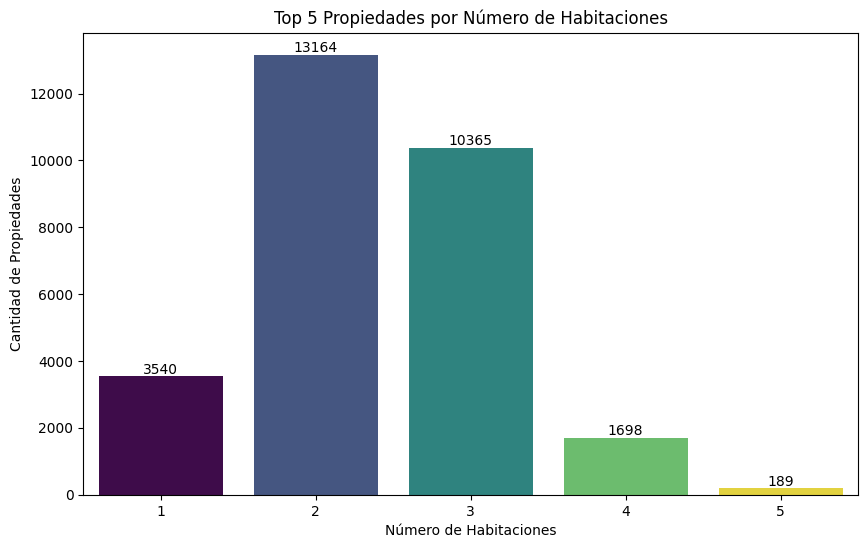

In [6]:

df_train.drop_duplicates(inplace=True)

# Contar el n√∫mero de propiedades por cantidad de habitaciones
bhk_counts = df_train['BHK_NO.'].value_counts().sort_index()

print("Conteo de propiedades por n√∫mero de habitaciones:")
print(bhk_counts)

# Contar el n√∫mero de propiedades por cantidad de habitaciones y ordenar
bhk_counts = df_train['BHK_NO.'].value_counts().nlargest(5).sort_index()

# Crear un DataFrame a partir de los 5 primeros conteos para el gr√°fico
bhk_df_top5 = bhk_counts.reset_index()
bhk_df_top5.columns = ['BHK_NO.', 'count']

# Crear un gr√°fico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BHK_NO.', y='count', data=bhk_df_top5, palette='viridis', hue='BHK_NO.', legend=False)
plt.title('Top 5 Propiedades por N√∫mero de Habitaciones')
plt.xlabel('N√∫mero de Habitaciones')
plt.ylabel('Cantidad de Propiedades')

# A√±adir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

üìä En este TOP 5, vemos que la gran mayoria de las viviendas son de 2 y 3 ambientes, pero ya podriamos estar viendo valores at√≠picos que tendremos que tratar.

El coeficiente de correlaci√≥n entre el tama√±o y el precio es: 0.41


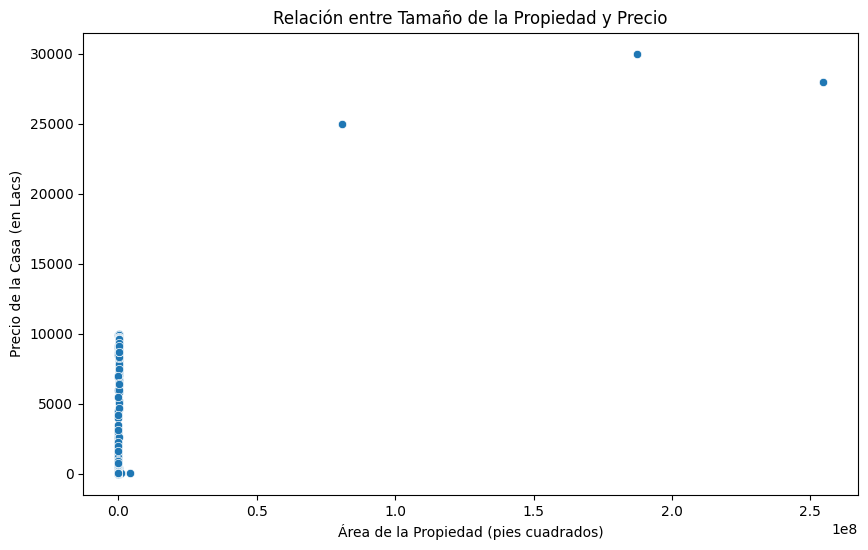

In [7]:
# 1. Calcular el coeficiente de correlaci√≥n
# Usamos el m√©todo .corr() de pandas
correlation = df_train['SQUARE_FT'].corr(df_train['TARGET(PRICE_IN_LACS)'])
print(f"El coeficiente de correlaci√≥n entre el tama√±o y el precio es: {correlation:.2f}")

# 2. Crear un gr√°fico de dispersi√≥n para visualizar la relaci√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=df_train)
plt.title('Relaci√≥n entre Tama√±o de la Propiedad y Precio')
plt.xlabel('√Årea de la Propiedad (pies cuadrados)')
plt.ylabel('Precio de la Casa (en Lacs)')
plt.show()

Cuantos mas metros cuadrados tiene la propiedad, el precio tiende a aumentar. Aun que esto es un factor importante, no es el √∫nico ni el m√°s influyente. Otros factores como la ubicaci√≥n, la condici√≥n, o el tipo de propiedad tambi√©n juegan un papel crucial en la determinaci√≥n del precio.

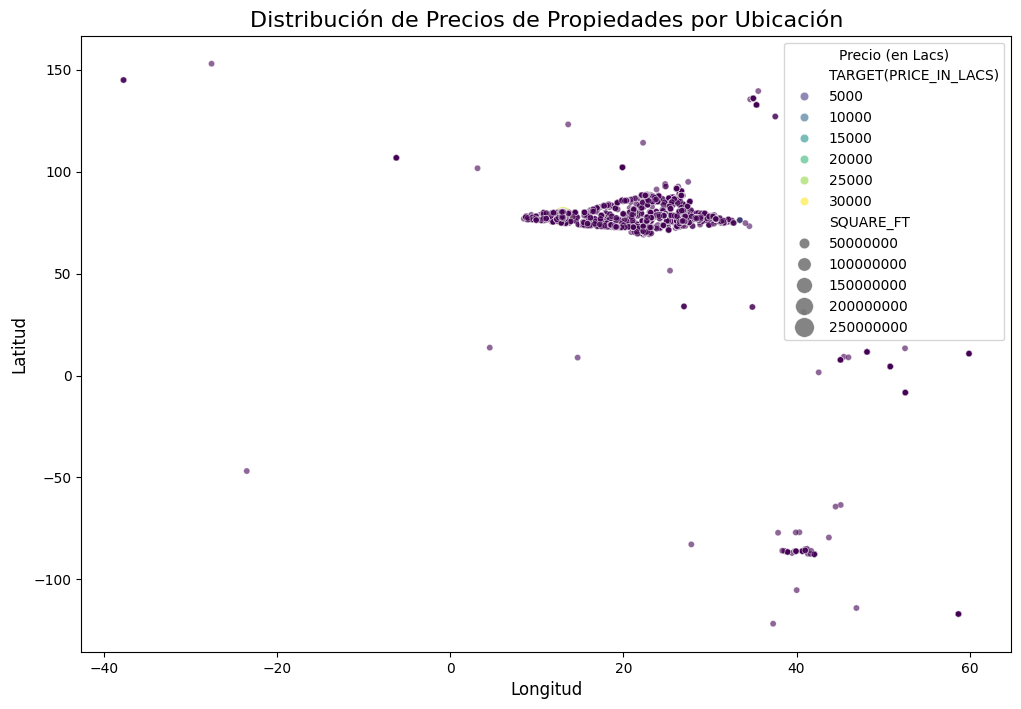

In [8]:
# Crear el gr√°fico de dispersi√≥n
# Usamos 'SQUARE_FT' como tama√±o del punto y el precio como color para un an√°lisis m√°s profundo.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='LONGITUDE',
    y='LATITUDE',
    data=df_train,
    hue='TARGET(PRICE_IN_LACS)',  # Color del punto seg√∫n el precio
    size='SQUARE_FT',            # Tama√±o del punto seg√∫n el √°rea
    sizes=(20, 200),             # Rango de tama√±o de los puntos
    palette='viridis',           # Paleta de colores
    alpha=0.6                    # Transparencia
)

plt.title('Distribuci√≥n de Precios de Propiedades por Ubicaci√≥n', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Precio (en Lacs)')
plt.show()

Estad√≠sticas del precio de las propiedades:
count    29050.000000
mean       141.712677
std        650.055763
min          0.250000
25%         38.000000
50%         61.750000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64


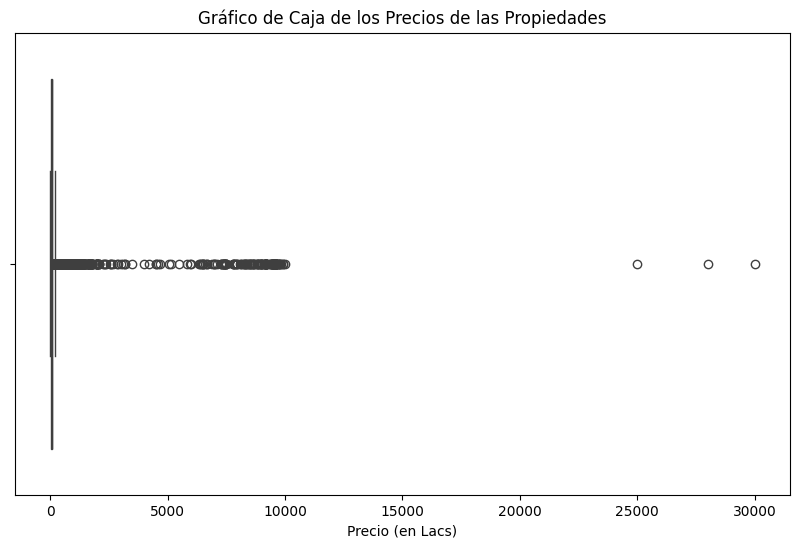

In [9]:
# Nombre de la columna de precios
price_column = 'TARGET(PRICE_IN_LACS)'

# 1. Mostrar estad√≠sticas descriptivas del precio
print("Estad√≠sticas del precio de las propiedades:")
print(df_train[price_column].describe())

# 2. Crear un gr√°fico de caja para visualizar la distribuci√≥n
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train[price_column])
plt.title('Gr√°fico de Caja de los Precios de las Propiedades')
plt.xlabel('Precio (en Lacs)')
plt.show()

Los resultados de las estad√≠sticas del precio (TARGET(PRICE_IN_LACS)) muestran la existencia de valores at√≠picos extremos en el conjunto de datos.

Esto significa que el 75% de todas las propiedades tienen un precio igual o menor a 100 lakhs, mientras que la propiedad m√°s cara cuesta 30.000 lakhs, un valor 300 veces mayor que el 75% de los datos. Esta disparidad tan grande distorsiona la escala de color.

Tendre que transformar la variable de precio usando una funci√≥n logar√≠tmica. Esta transformaci√≥n reduce la magnitud de los valores m√°s altos sin perder la informaci√≥n sobre su relaci√≥n con las otras variables.

Estad√≠sticas del precio transformado (log):
count    29050.000000
mean         4.230121
std          0.883316
min          0.223144
25%          3.663562
50%          4.139158
75%          4.615121
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


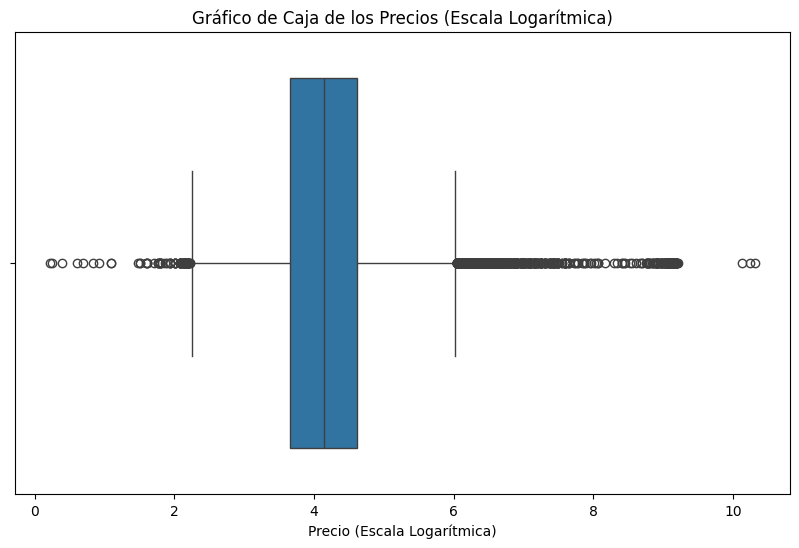

In [10]:
# Aplicar la transformaci√≥n logar√≠tmica a la columna de precios
# Usamos np.log1p para evitar errores con valores de 0
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Ahora, analiza la distribuci√≥n de la nueva variable transformada
print("Estad√≠sticas del precio transformado (log):")
print(df_train['TARGET(PRICE_IN_LACS)_log'].describe())

# Visualiza la nueva distribuci√≥n con un box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['TARGET(PRICE_IN_LACS)_log'])
plt.title('Gr√°fico de Caja de los Precios (Escala Logar√≠tmica)')
plt.xlabel('Precio (Escala Logar√≠tmica)')
plt.show()

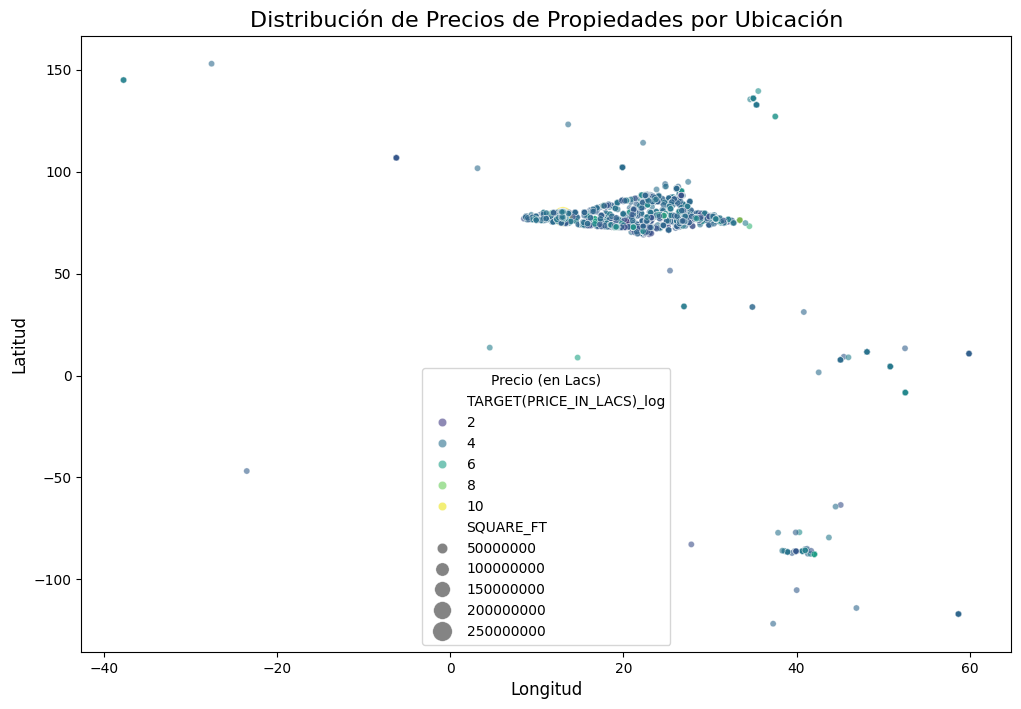

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='LONGITUDE',
    y='LATITUDE',
    data=df_train,
    hue='TARGET(PRICE_IN_LACS)_log',  # Color del punto seg√∫n el precio
    size='SQUARE_FT',            # Tama√±o del punto seg√∫n el √°rea
    sizes=(20, 200),             # Rango de tama√±o de los puntos
    palette='viridis',           # Paleta de colores
    alpha=0.6                    # Transparencia
)

plt.title('Distribuci√≥n de Precios de Propiedades por Ubicaci√≥n', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Precio (en Lacs)')
plt.show()

üöÄ La transformaci√≥n logar√≠tmica ha "normalizado" los datos, lo que significa que la mayor√≠a de los valores se concentran alrededor de la media (los tonos azules y celestes), mientras que los valores extremos (los precios m√°s altos) son mucho menos comunes y, por lo tanto, se muestran con los tonos amarillos.

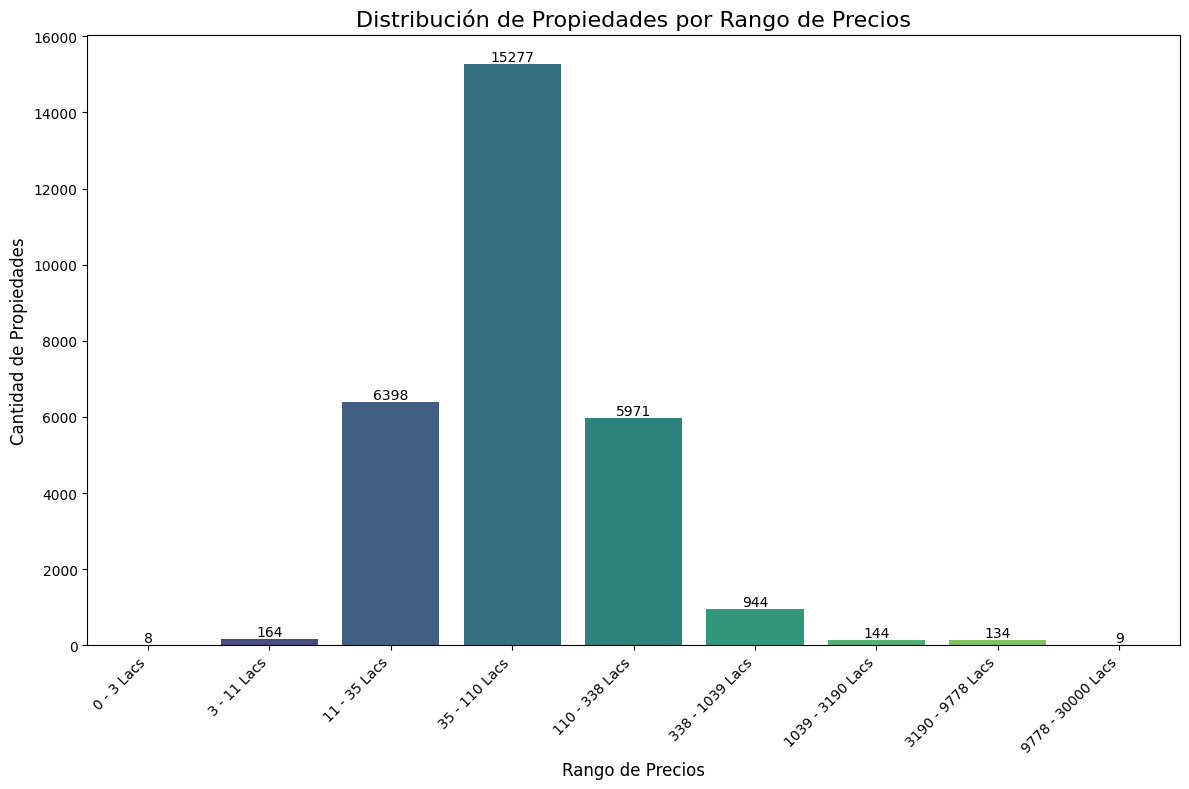

In [27]:

df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear rangos de precios y contar cu√°ntas propiedades caen en cada uno
bins = np.linspace(df_train['TARGET(PRICE_IN_LACS)_log'].min(), df_train['TARGET(PRICE_IN_LACS)_log'].max(), 10)
price_distribution = pd.cut(df_train['TARGET(PRICE_IN_LACS)_log'], bins=bins).value_counts().sort_index()

# Convertir la serie a un DataFrame para el gr√°fico
price_distribution_df = price_distribution.reset_index()
price_distribution_df.columns = ['Price_Range', 'Count']

# --- Aqu√≠ est√° la clave ---
# Revertir la transformaci√≥n logar√≠tmica para crear etiquetas legibles en lakhs
price_ranges_original = [
    f'{np.expm1(interval.left):.0f} - {np.expm1(interval.right):.0f} Lacs'
    for interval in price_distribution_df['Price_Range']
]
# Asignar las nuevas etiquetas al DataFrame
price_distribution_df['Price_Range'] = price_ranges_original

# Crear el gr√°fico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Price_Range',
    y='Count',
    data=price_distribution_df,
    palette='viridis',
    hue='Price_Range',
    legend=False
)

# A√±adir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Distribuci√≥n de Propiedades por Rango de Precios', fontsize=16)
plt.xlabel('Rango de Precios', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mostrar el rango de precios en lakhs hace que el gr√°fico sea mucho m√°s f√°cil de entender

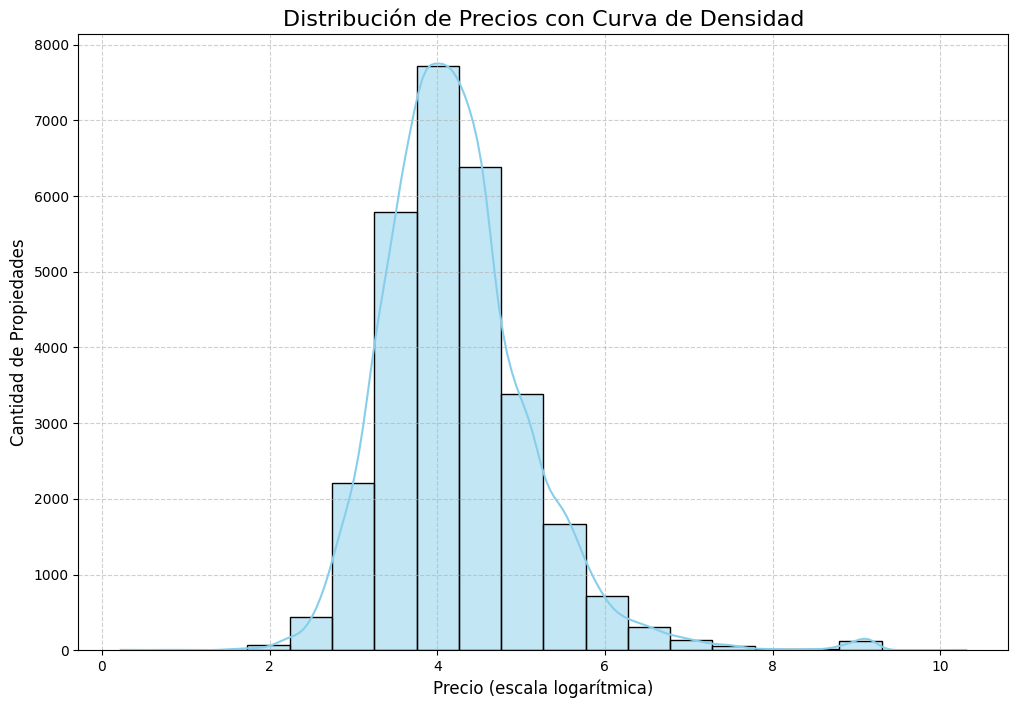

In [26]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear el histograma con la curva de densidad
plt.figure(figsize=(12, 8))
sns.histplot(
    x='TARGET(PRICE_IN_LACS)_log',
    data=df_train,
    kde=True,  # <--- Esta es la clave para la curva de distribucion
    bins=20,   # Puedes ajustar el numero de barras para mayor detalle
    color='skyblue'
)

plt.title('Distribuci√≥n de Precios con Curva de Densidad', fontsize=16)
plt.xlabel('Precio (escala logar√≠tmica)', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Inicialmente, la distribuci√≥n de los precios de las propiedades era muy desigual, con la mayor√≠a concentrada en el rango bajo y unos pocos precios extremadamente altos (valores at√≠picos) que distorsionaban el an√°lisis. Para resolver esto, aplicamos una transformaci√≥n logar√≠tmica. Este proceso comprimi√≥ los valores m√°s altos y estir√≥ los m√°s bajos, lo que result√≥ en una distribuci√≥n m√°s equilibrada y similar a una campana.

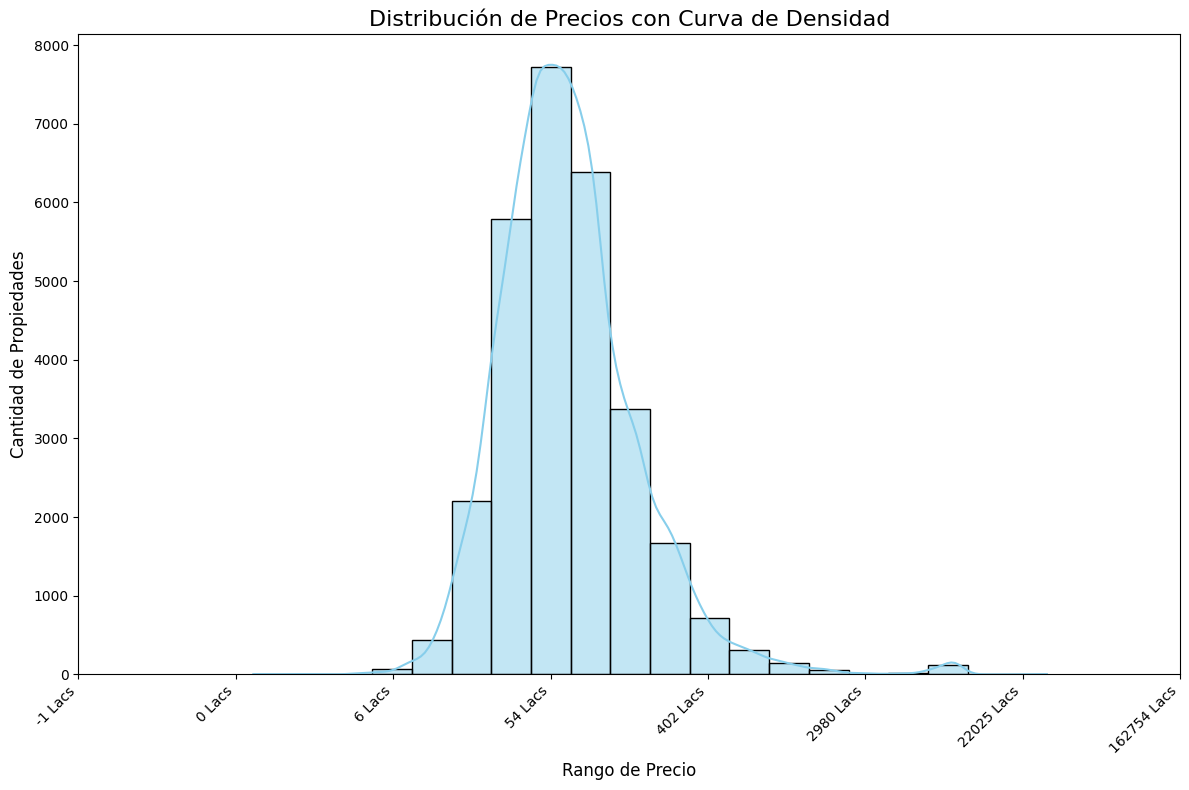

In [30]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear el histograma con la curva de densidad
plt.figure(figsize=(12, 8))
ax = sns.histplot(
    x='TARGET(PRICE_IN_LACS)_log',
    data=df_train,
    kde=True,
    bins=20, # Usar 20 bins para una visualizacion mas detallada
    color='skyblue'
)

# --- Correcci√≥n aqu√≠ ---
# Obtener las posiciones de los ticks que el gr√°fico cre√≥ autom√°ticamente
tick_locs = ax.get_xticks()

# Revertir la transformaci√≥n logar√≠tmica para obtener los valores en lakhs
lakhs_values = np.expm1(tick_locs)

# Crear las etiquetas en un formato legible (ej. "10 Lacs")
labels = [f'{val:.0f} Lacs' for val in lakhs_values]

# Establecer las nuevas etiquetas en el eje X
ax.set_xticks(tick_locs)
ax.set_xticklabels(labels, rotation=45, ha='right')

# T√≠tulo y etiquetas
plt.title('Distribuci√≥n de Precios con Curva de Densidad', fontsize=16)
plt.xlabel('Rango de Precio', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.tight_layout()
plt.show()

Es importante recordar que 1 lakh equivale a 100,000 rupias indias (INR). Esto nos permite presentar una visualizaci√≥n que es precisa desde el punto de vista t√©cnico y clara para una audiencia no especializada.

In [12]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Calcula la correlaci√≥n de Pearson y el valor p
corr, p_value = pearsonr(df_train['BHK_NO.'], df_train['TARGET(PRICE_IN_LACS)_log'])

print(f"Coeficiente de correlaci√≥n de Pearson (r): {corr:.4f}")
print(f"Valor p (P-value): {p_value:.4f}")

Coeficiente de correlaci√≥n de Pearson (r): 0.4807
Valor p (P-value): 0.0000


Otro analisis que se puede abordar relaciona el n√∫mero de habitaciones de la propiedad ('BHK_NO.') con el pricio de la misma.

r=0.4807 significa que a medida que el n√∫mero de habitaciones aumenta, el precio de la propiedad tambi√©n tiende a subir. Es un hallazgo esperado, ya que las propiedades m√°s grandes y con m√°s habitaciones suelen tener un mayor valor en el mercado.

Valor p (P-value): 0.0000 significa que este resultado es estad√≠sticamente muy significativo. Puedes estar muy seguro de que la relaci√≥n entre el n√∫mero de habitaciones y el precio es real y no una simple coincidencia.


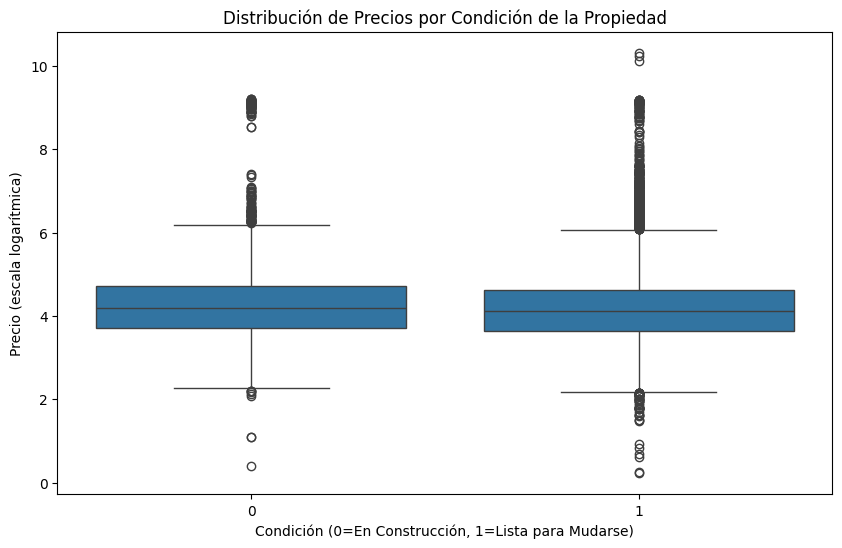

--- An√°lisis de READY_TO_MOVE ---
Estad√≠sticas para propiedades listas para mudarse (1):
count    23851.000000
mean         4.210893
std          0.865881
min          0.223144
25%          3.637586
50%          4.110874
75%          4.615121
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64

Estad√≠sticas para propiedades en construcci√≥n (0):
count    5199.000000
mean        4.318335
std         0.954383
min         0.392042
25%         3.713572
50%         4.198705
75%         4.709530
max         9.209440
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


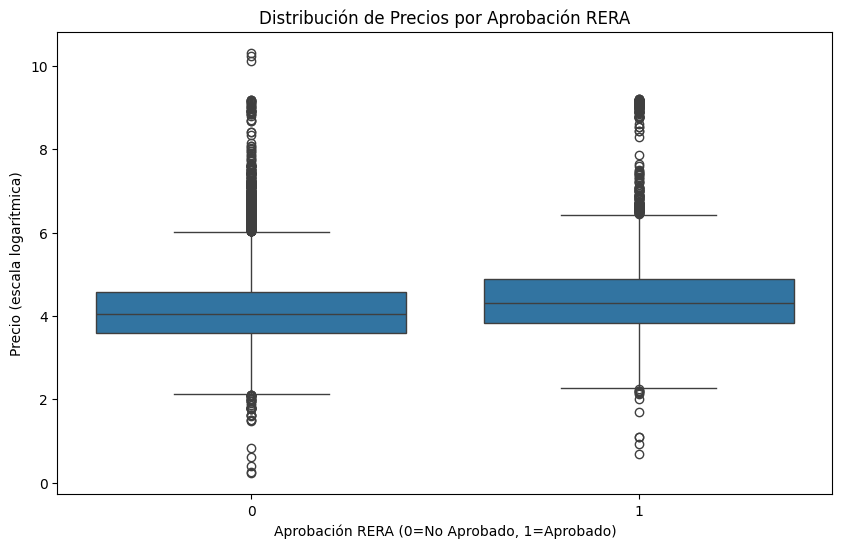


--- An√°lisis de RERA ---
Estad√≠sticas para propiedades con RERA (1):
count    9176.000000
mean        4.417566
std         0.928850
min         0.693147
25%         3.828641
50%         4.317488
75%         4.875197
max         9.209440
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64

Estad√≠sticas para propiedades sin RERA (0):
count    19874.000000
mean         4.143577
std          0.847630
min          0.223144
25%          3.583519
50%          4.043051
75%          4.564348
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


In [13]:
# An√°lisis de READY_TO_MOVE vs UNDER_CONSTRUCTION
# --- Visualizaci√≥n del Gr√°fico de Caja ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='READY_TO_MOVE', y='TARGET(PRICE_IN_LACS)_log', data=df_train)
plt.title('Distribuci√≥n de Precios por Condici√≥n de la Propiedad')
plt.xlabel('Condici√≥n (0=En Construcci√≥n, 1=Lista para Mudarse)')
plt.ylabel('Precio (escala logar√≠tmica)')
plt.show()

# --- Estad√≠sticas en Texto ---
print("--- An√°lisis de READY_TO_MOVE ---")
df_ready = df_train[df_train['READY_TO_MOVE'] == 1]['TARGET(PRICE_IN_LACS)_log']
df_under_con = df_train[df_train['READY_TO_MOVE'] == 0]['TARGET(PRICE_IN_LACS)_log']

print("Estad√≠sticas para propiedades listas para mudarse (1):")
print(df_ready.describe())
print("\nEstad√≠sticas para propiedades en construcci√≥n (0):")
print(df_under_con.describe())

# An√°lisis de RERA
# --- Visualizaci√≥n del Gr√°fico de Caja ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='RERA', y='TARGET(PRICE_IN_LACS)_log', data=df_train)
plt.title('Distribuci√≥n de Precios por Aprobaci√≥n RERA')
plt.xlabel('Aprobaci√≥n RERA (0=No Aprobado, 1=Aprobado)')
plt.ylabel('Precio (escala logar√≠tmica)')
plt.show()

# --- Estad√≠sticas en Texto ---
print("\n--- An√°lisis de RERA ---")
df_rera_yes = df_train[df_train['RERA'] == 1]['TARGET(PRICE_IN_LACS)_log']
df_rera_no = df_train[df_train['RERA'] == 0]['TARGET(PRICE_IN_LACS)_log']

print("Estad√≠sticas para propiedades con RERA (1):")
print(df_rera_yes.describe())
print("\nEstad√≠sticas para propiedades sin RERA (0):")
print(df_rera_no.describe())

üìù Las caracter√≠sticas "lista para mudarse" y la aprobaci√≥n RERA s√≠ tienen un impacto en el precio de las propiedades.

Curiosamente, las propiedades en construcci√≥n tienen un precio mediano ligeramente m√°s alto que las propiedades listas para mudarse. Esto contradice lo que se podr√≠a pensar intuitivamente, pero puede deberse a que las propiedades en construcci√≥n a menudo son parte de proyectos nuevos y m√°s modernos.

La mediana del precio de las propiedades con aprobaci√≥n RERA es de 4.32, mientras que la de las propiedades sin aprobaci√≥n RERA es de 4.04.

La aprobaci√≥n RERA est√° claramente asociada con precios m√°s altos. La diferencia en las medianas es significativa. Esto tiene sentido, ya que RERA es una regulaci√≥n que brinda seguridad a los compradores, lo que les da una mayor confianza para pagar m√°s por una propiedad.

‚úÖ **Conclusi√≥n preliminares del Proyecto**

Estos resultados validan el an√°lisis exploratorio:

La transformaci√≥n logar√≠tmica normaliz√≥ la distribuci√≥n de los precios.

La mayor√≠a de las propiedades se concentran en un rango de precios espec√≠fico.

Los valores extremos han disminuido, lo que te permite trabajar con un conjunto de datos m√°s robusto.

üß† **¬øSiguiente paso: Construcci√≥n y optimizaci√≥n de modelos de machine learning?**
